In [1]:
#median_house_value -- TARGET VARIABLE
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;

import warnings
warnings.filterwarnings('ignore')

# DATA EXPLORATION

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.shape

(20640, 10)

In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
df1 = df.drop(['longitude','latitude'], axis = 1, inplace = True)

# DATA CLEANING
-- Drop duplicates -- if any 
-- Fill-in Null Values 
-- Check Outliers 
-- Convert Categorical Value into numerical value

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
df.dtypes

housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [11]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(),inplace = True);

In [12]:
df.isna().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<AxesSubplot:xlabel='median_house_value'>

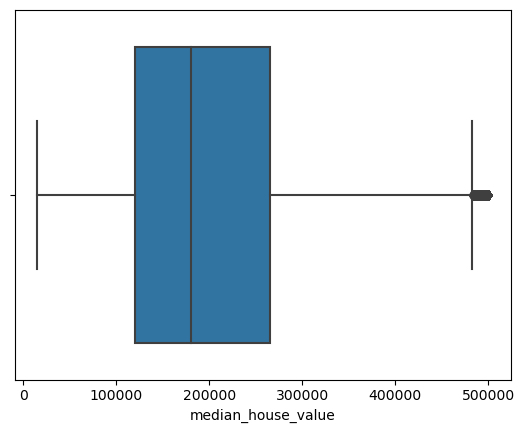

In [13]:
sns.boxplot(df['median_house_value'])

<AxesSubplot:xlabel='population'>

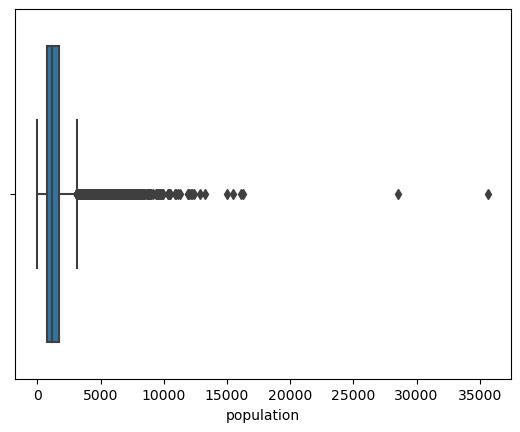

In [14]:
sns.boxplot(df['population'])

<AxesSubplot:xlabel='housing_median_age'>

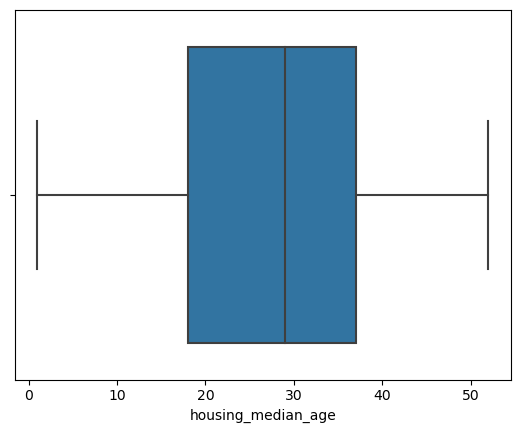

In [15]:
sns.boxplot(df['housing_median_age'])

<AxesSubplot:xlabel='median_income'>

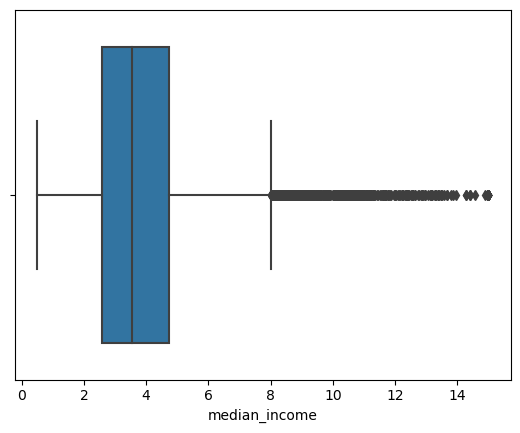

In [16]:
sns.boxplot(df['median_income'])

In [17]:
def remove_outliers(df,col):
    q1 = df[col].quantile(0.25);
    q3 = df[col].quantile(0.75);
    iqr = q3 - q1;
    
    max_ = q3 + (1.5*iqr);
    min_ = q1 - (1.5*iqr);
    
    df.loc[df[col] < min_,col] = min_;
    df.loc[df[col] > max_,col] = max_;

In [18]:
remove_outliers(df,'median_house_value')

In [19]:
remove_outliers(df,'population')
remove_outliers(df,'median_income')

<AxesSubplot:xlabel='median_house_value'>

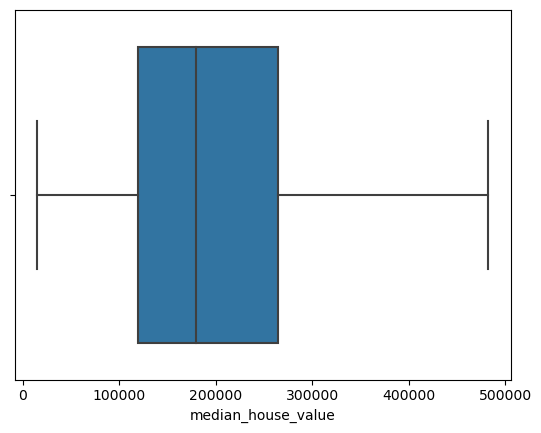

In [20]:
sns.boxplot(df['median_house_value'])

<AxesSubplot:xlabel='population'>

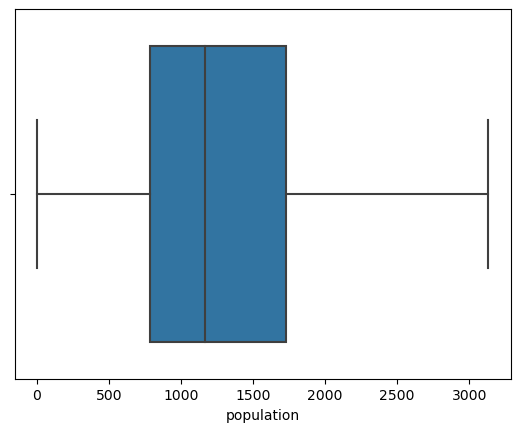

In [21]:
sns.boxplot(df['population'])

<AxesSubplot:xlabel='median_income'>

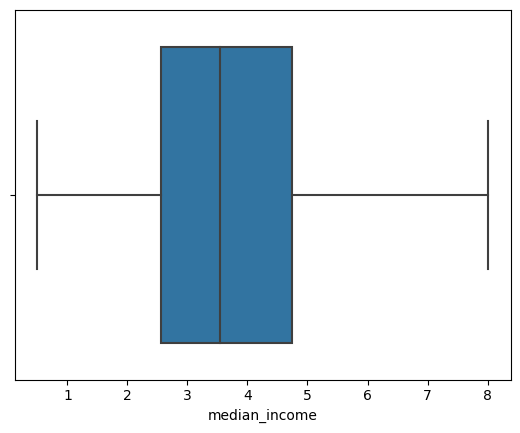

In [22]:
sns.boxplot(df['median_income'])

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
encoder = LabelEncoder()

for col in df.columns:
    if(col == 'ocean_proximity'):
        df[col] = encoder.fit_transform(df[col])

In [25]:
df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.013025,452600.0,3
1,21.0,7099.0,1106.0,2401.0,1138.0,8.013025,358500.0,3
2,52.0,1467.0,190.0,496.0,177.0,7.257400,352100.0,3
3,52.0,1274.0,235.0,558.0,219.0,5.643100,341300.0,3
4,52.0,1627.0,280.0,565.0,259.0,3.846200,342200.0,3
...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.560300,78100.0,1
20636,18.0,697.0,150.0,356.0,114.0,2.556800,77100.0,1
20637,17.0,2254.0,485.0,1007.0,433.0,1.700000,92300.0,1
20638,18.0,1860.0,409.0,741.0,349.0,1.867200,84700.0,1


### Scaled the dataframe

In [26]:
from sklearn.preprocessing import MinMaxScaler;

In [27]:
scaler = MinMaxScaler()
df_new = df.copy()

In [28]:
for col in df_new.columns:
    if (col != 'median_house_value'):
        df_new[col] = scaler.fit_transform(df_new[col].values.reshape(-1,1))

In [29]:
df_new

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.784314,0.022331,0.019863,0.101950,0.020556,1.000000,452600.0,0.75
1,0.392157,0.180503,0.171477,0.766379,0.186976,1.000000,358500.0,0.75
2,1.000000,0.037260,0.029330,0.157558,0.028943,0.899426,352100.0,0.75
3,1.000000,0.032352,0.036313,0.177373,0.035849,0.684562,341300.0,0.75
4,1.000000,0.041330,0.043296,0.179610,0.042427,0.445394,342200.0,0.75
...,...,...,...,...,...,...,...,...
20635,0.470588,0.042296,0.057883,0.269096,0.054103,0.141140,78100.0,0.25
20636,0.333333,0.017676,0.023122,0.112816,0.018582,0.273774,77100.0,0.25
20637,0.313725,0.057277,0.075109,0.320869,0.071041,0.159734,92300.0,0.25
20638,0.333333,0.047256,0.063315,0.235858,0.057227,0.181988,84700.0,0.25


### Check Correlation

<AxesSubplot:>

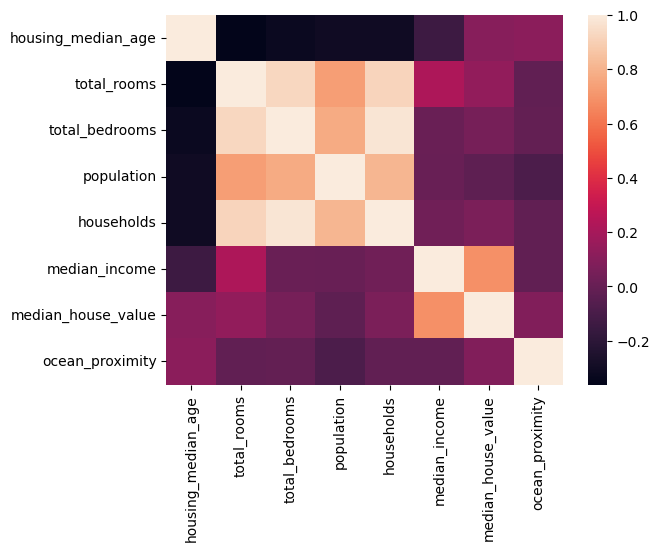

In [30]:
sns.heatmap(df_new.corr())

In [31]:
corr = df_new.corr()
corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=np.bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False);
corr_df = pd.DataFrame(corr_unstacked[corr_unstacked>.75]).sort_index()

In [32]:
corr_df

0
population     households      0.810455
total_bedrooms households      0.974366
               population      0.775681
total_rooms    households      0.918484
               total_bedrooms  0.927058

In [33]:
df_new.drop(['total_bedrooms','households'], axis =1,inplace = True)

<AxesSubplot:>

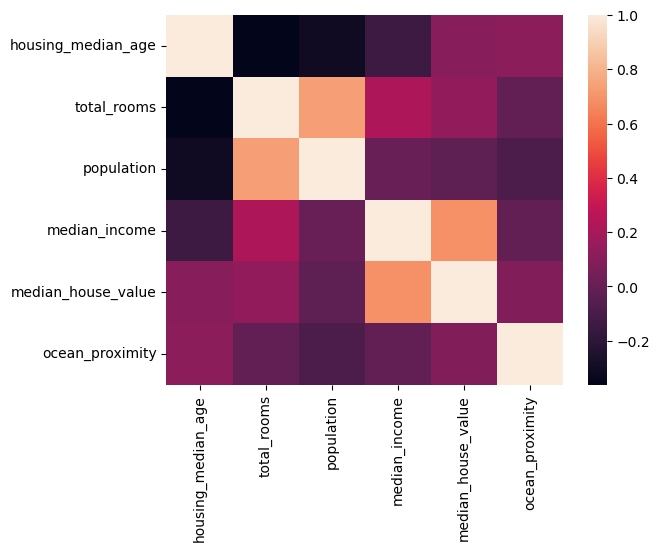

In [34]:
sns.heatmap(df_new.corr())

In [35]:
corr = df_new.corr()
corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=np.bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False);
corr_df = pd.DataFrame(corr_unstacked[corr_unstacked>.75]).sort_index()

corr_df

,,0


In [36]:
# df_new.drop(['total_rooms'], axis =1,inplace = True)

In [37]:
# sns.heatmap(df_new.corr())

# corr = df_new.corr()
# corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=np.bool)))
# corr_unstacked = corr_mask.unstack().sort_values(ascending = False);
# corr_df = pd.DataFrame(corr_unstacked[corr_unstacked>.75]).sort_index()

# corr_df

# DATA MODELLING

In [38]:
X = df_new.drop(['median_house_value'],axis=1)
y = df_new['median_house_value']

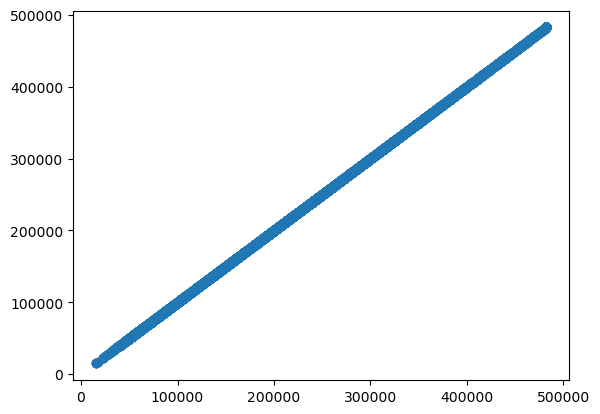

In [39]:
plt.scatter(y,y)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, train_size=.70);

In [42]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [43]:
def evaluate_model(model):
    y_pred = model.predict(X_test);
    print('r^2 Score: ', r2_score(y_test, y_pred)) # accuracy score
    print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred)); #closer to zero, better
    print('Root Mean Square Eror: ', np.sqrt(mean_squared_error(y_test, y_pred)))  #closer to zero, better
    
    plt.scatter(y_train, model.predict(X_train), color='r')
    plt.plot(y_pred, y_pred)
    plt.show()

LinearRegression()
r^2 Score:  0.5252296195337327
Mean Absolute Error:  58482.21890400382
Root Mean Square Eror:  77515.8139183303


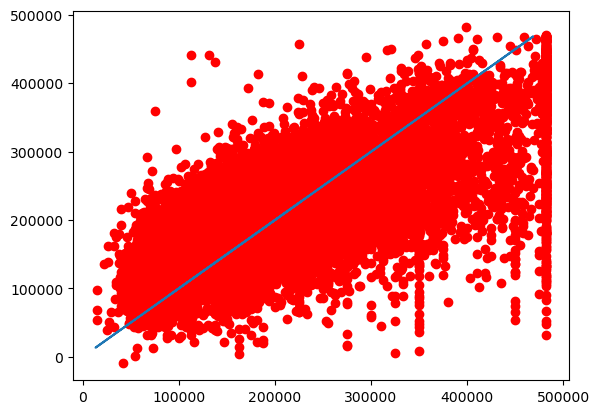

GradientBoostingRegressor()
r^2 Score:  0.6641025627062953
Mean Absolute Error:  46692.68524945253
Root Mean Square Eror:  65200.638439803566


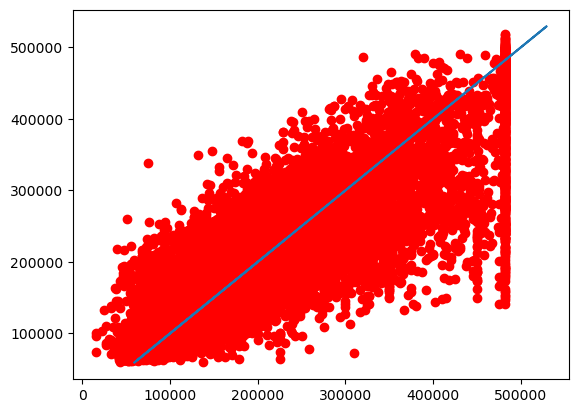

ElasticNet()
r^2 Score:  0.08679320015769654
Mean Absolute Error:  85524.39310583423
Root Mean Square Eror:  107506.0911364436


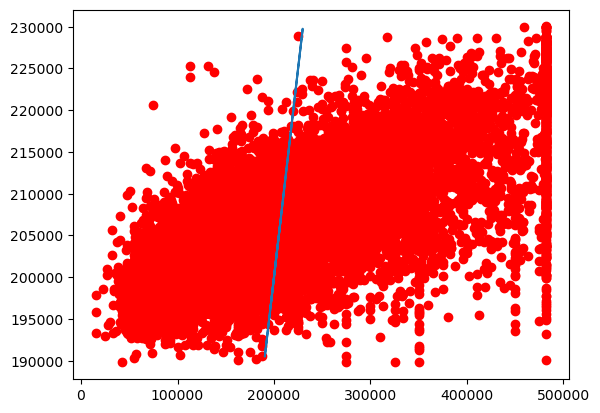

SGDRegressor()
r^2 Score:  0.5250291312052227
Mean Absolute Error:  58306.61354046548
Root Mean Square Eror:  77532.17906690258


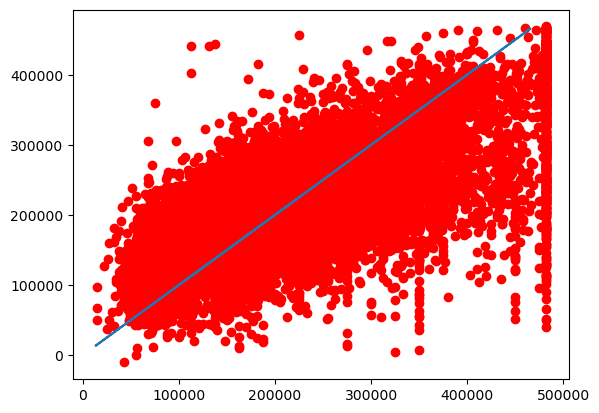

BayesianRidge()
r^2 Score:  0.5252414905329519
Mean Absolute Error:  58481.97534844031
Root Mean Square Eror:  77514.84482257743


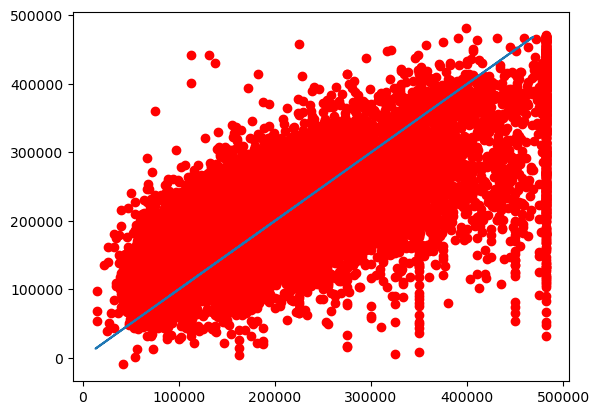

KernelRidge()
r^2 Score:  0.523237469538228
Mean Absolute Error:  59019.95152861536
Root Mean Square Eror:  77678.27295401235


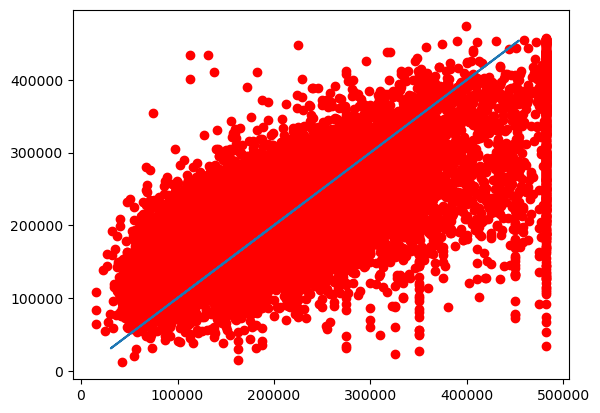

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
r^2 Score:  0.667855380872995
Mean Absolute Error:  46402.434267709
Root Mean Square Eror:  64835.38792338629


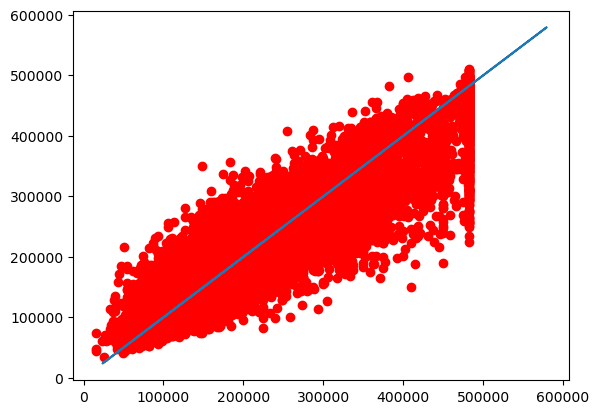

LGBMRegressor()
r^2 Score:  0.6850290648706332
Mean Absolute Error:  45087.99689550318
Root Mean Square Eror:  63136.97104083664


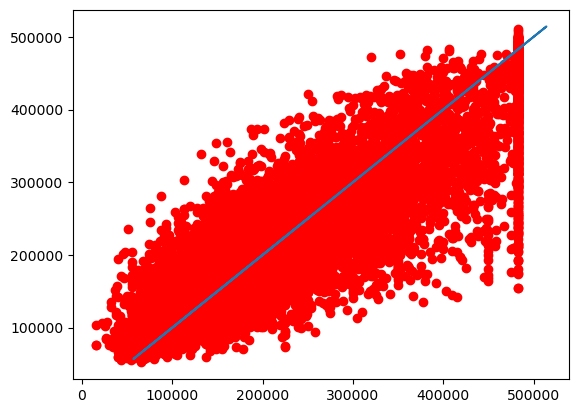

RandomForestRegressor()
r^2 Score:  0.6572064912397195
Mean Absolute Error:  46726.57776764088
Root Mean Square Eror:  65866.53203238927


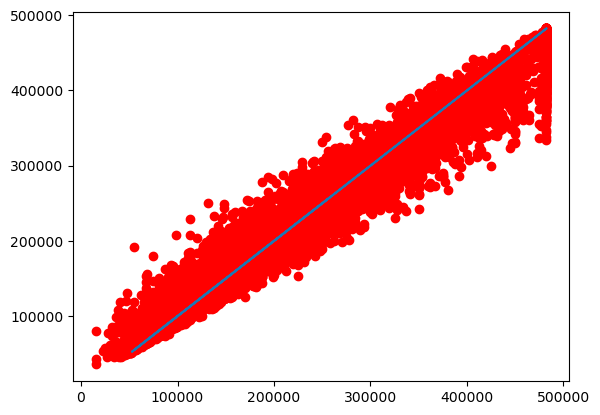

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor;
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.kernel_ridge import KernelRidge;
from xgboost import XGBRegressor;
from lightgbm import LGBMRegressor;
from sklearn.ensemble import RandomForestRegressor


models = [LinearRegression(), GradientBoostingRegressor(), ElasticNet(), SGDRegressor(), 
          BayesianRidge(), KernelRidge(), XGBRegressor(), LGBMRegressor(), RandomForestRegressor()]
for model in models:
    print(model)
    model.fit(X_train, y_train)
    evaluate_model(model)


r^2 Score:  0.6850290648706332
Mean Absolute Error:  45087.99689550318
Root Mean Square Eror:  63136.97104083664


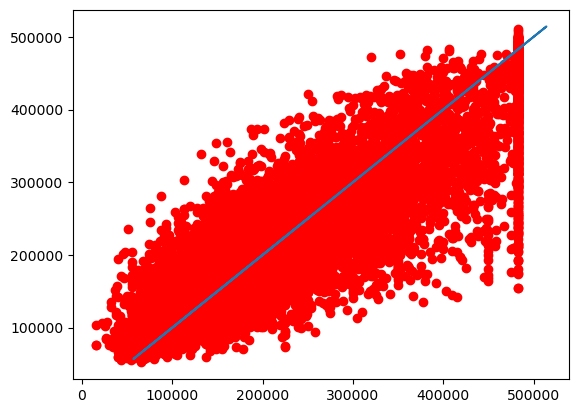

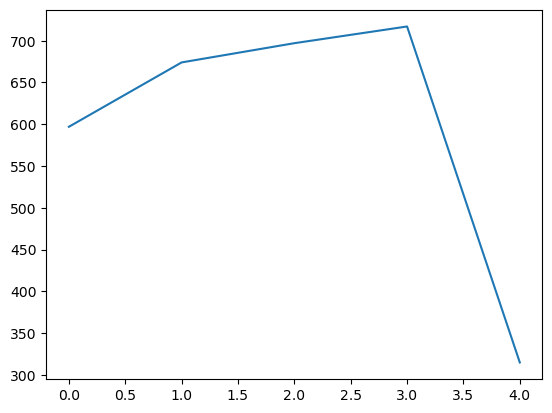

In [45]:
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
evaluate_model(lgbm)
plt.plot(lgbm.feature_importances_)

In [46]:
X.columns

Index(['housing_median_age', 'total_rooms', 'population', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [47]:
X.head()

,housing_median_age,total_rooms,population,median_income,ocean_proximity
0,0.784314,0.022331,0.101950,1.000000,0.75
1,0.392157,0.180503,0.766379,1.000000,0.75
2,1.000000,0.037260,0.157558,0.899426,0.75
3,1.000000,0.032352,0.177373,0.684562,0.75
4,1.000000,0.041330,0.179610,0.445394,0.75


# CHOOSE MODEL

LGBMRegressor is my chosen model, it has the highest r2 score (69%) compared to others and 
the most close to zero in MAE (45087.99) and RMSE (63136.97).
While the most important feature in our target variable is the population